In [3]:
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [4]:
# Get the data
df = pd.read_csv('xclara.csv')
print(df.shape)
df.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


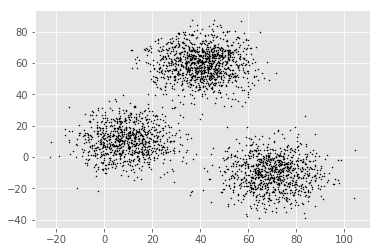

In [5]:
x = df['V1'].values
y = df['V2'].values
X = np.array(list(zip(x,y)))
plt.scatter(x,y, c='black', s=1)

In [35]:
# calculate the Euclidean Distance between 2 vectors in 2D plane
def euclideanDistance(x, y, ax):
    return np.linalg.norm(x-y, axis=ax)

Initial Random Centroids of 3 Clusters
[[74.  2.]
 [81. 42.]
 [ 0. 60.]]


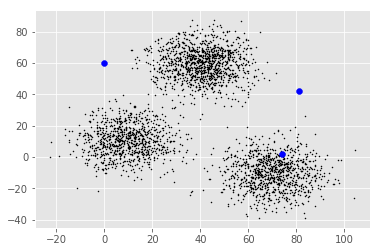

Initial Random Centroids of 3 Clusters
[[38. 48.]
 [29. 53.]
 [26. 13.]]
25.642683
3.1397452
3.9419262
5.887956
11.6852
23.598444
19.556154
1.1858596
0.042818844
0.0


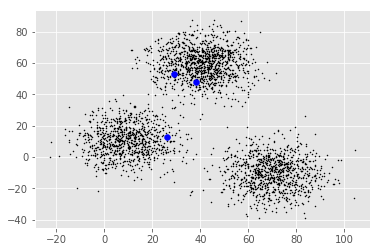

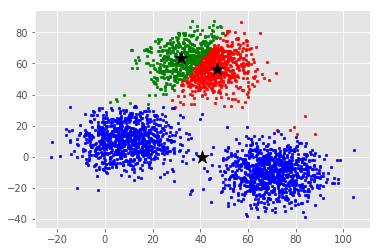

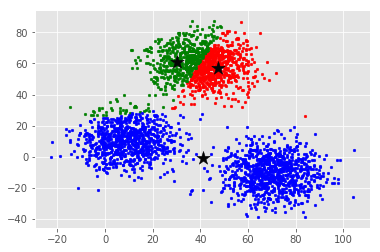

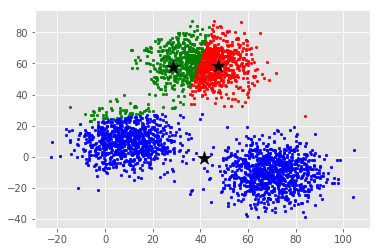

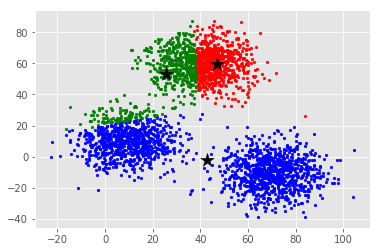

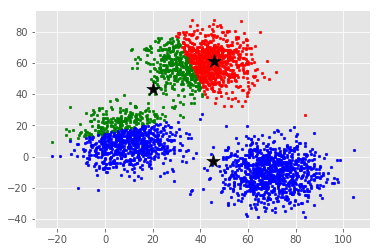

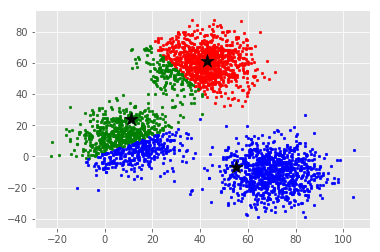

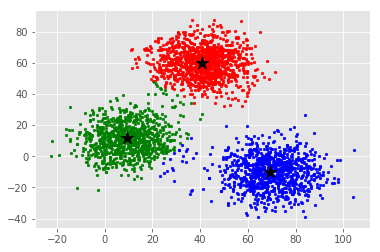

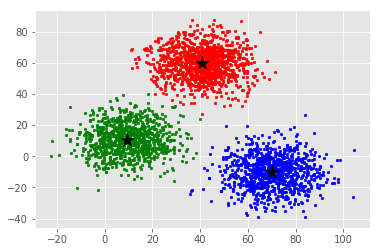

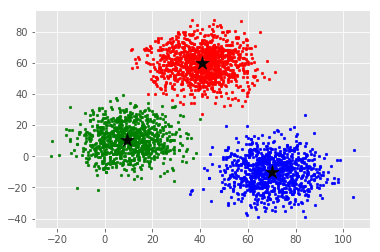

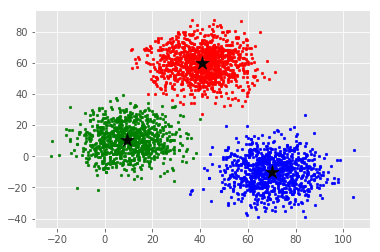

In [59]:
# Define the number of clusters
k = 3

# Initiate random centroids 
cx = np.random.randint(0, np.max(X)-20, size=k)
cy = np.random.randint(0, np.max(X)-20, size=k)

centroids = np.array(list(zip(cx,cy)), dtype=np.float32)
print('Initial Random Centroids of {} Clusters'.format(k))
print(centroids)
# Plot with Centroids
plt.scatter(x,y, c='black', s=1)
plt.scatter(cx,cy, marker='o', s=35, c='blue')

old_centroids = np.zeros(centroids.shape)
cluster_labels = np.zeros(len(X))

error = euclideanDistance(centroids, old_centroids, None)
m = 0
while error != 0:
    m += 1
    for i in range(len(X)):
        d = euclideanDistance(X[i], centroids, 1)
        cluster_index = np.argmin(d)
        cluster_labels[i] = cluster_index
    
    old_centroids = centroids.copy()
    
    for i in range(k):
        points = [X[j] for j in range(len(X)) if cluster_labels[j] == i]
        centroids[i] = np.mean(points, axis=0)
    error = euclideanDistance(centroids, old_centroids, None)
    print(error)
    colors = ['r', 'g', 'b']

    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if cluster_labels[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')